<a href="https://colab.research.google.com/github/2203A51251/NLP_Lab/blob/main/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Flatten


**1. Load data fromkeras.datasets and perform following computational analysis:- [CO2]**

(a) Preprocessing of the Data

(b) Divide data into training and testing data set

(c) Build the Recurrent Neural network (RNN) Model

(d) Training the RNN Model

(e) Evaluate the model on the test dataset to see how well it generalizes.

In [10]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
model = Sequential()
model.add(SimpleRNN(128, input_shape=(28, 28), activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.7023 - loss: 0.8646 - val_accuracy: 0.9400 - val_loss: 0.2026
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9339 - loss: 0.2184 - val_accuracy: 0.9623 - val_loss: 0.1252
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9565 - loss: 0.1472 - val_accuracy: 0.9685 - val_loss: 0.1048
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9612 - loss: 0.1346 - val_accuracy: 0.9692 - val_loss: 0.1042
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9623 - loss: 0.1290 - val_accuracy: 0.9662 - val_loss: 0.1203
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9516 - loss: 0.1599
Test accuracy: 0.9577000141143799


2. Develop LSTM (Long Short-Term Memory) by utilizing data set from https://www.kaggle.com/code/amirrezaeian/time-series-data-analysis-using-lstm-tutorialLinks to an external site. or take any time series data. [CO2]


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 210ms/step - loss: 0.0784 - val_loss: 0.1510
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0425 - val_loss: 0.0433
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0101 - val_loss: 0.0271
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0179 - val_loss: 0.0298
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0149 - val_loss: 0.0215
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0086 - val_loss: 0.0315
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0103 - val_loss: 0.0363
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0112 - val_loss: 0.0294
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0085 - val_loss: 0.0222
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0065 - val_loss: 0.0231
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0080 - val_loss: 0.0252
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0075 - val_loss: 0.0235
Epoch 13/20

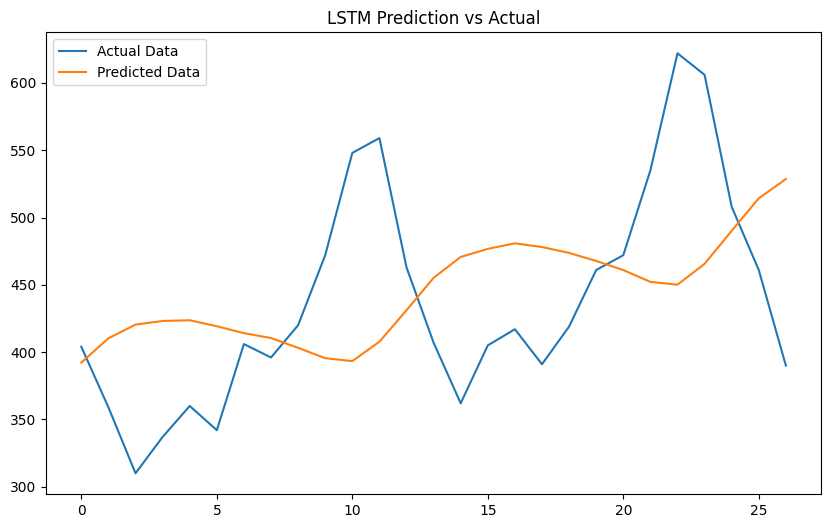

In [11]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(url, usecols=[1])
data = data.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)
time_step = 10
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = Sequential()
model.add(LSTM(100, input_shape=(time_step, 1), return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
y_test_scaled = scaler.inverse_transform([y_test])
plt.figure(figsize=(10,6))
plt.plot(y_test_scaled[0], label='Actual Data')
plt.plot(predicted, label='Predicted Data')
plt.title('LSTM Prediction vs Actual')
plt.legend()
plt.show()

3. Demonstrate Vanishing and Exploding Gradients on deep neural network. [CO2]

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9746
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9626
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0172
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9690
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9847
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9505
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0461
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9882
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9530
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9780


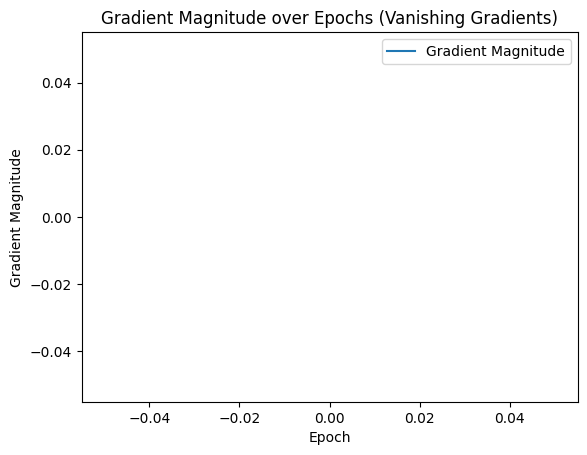

In [12]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import Callback
class GradientTracker(Callback):
    def on_train_begin(self, logs=None):
        self.epoch_gradients = []
    def on_epoch_end(self, epoch, logs=None):
        weights = self.model.trainable_weights
def create_deep_model(activation_function='sigmoid'):
    model = Sequential()
    model.add(Dense(128, input_shape=(10,), activation=activation_function))
    for _ in range(9):
        model.add(Dense(128, activation=activation_function))
    model.add(Dense(1))
    return model
np.random.seed(42)
X = np.random.randn(1000, 10)
y = np.random.randn(1000, 1)
model = create_deep_model(activation_function='sigmoid')
model.compile(optimizer=SGD(learning_rate=0.01), loss='mean_squared_error')
gradient_tracker = GradientTracker()
history = model.fit(X, y, epochs=10, batch_size=32, verbose=1, callbacks=[gradient_tracker])
gradients = gradient_tracker.epoch_gradients
def calculate_gradient_magnitude(gradients):
    grad_norms = []
    for epoch_grad in gradients:
        epoch_norms = []
        for grad in epoch_grad:
            if grad is not None:
                norm = np.linalg.norm(grad.numpy())
                epoch_norms.append(norm)
        grad_norms.append(np.mean(epoch_norms))
    return grad_norms
gradient_magnitudes = calculate_gradient_magnitude(gradients)
plt.plot(range(1, len(gradient_magnitudes) + 1), gradient_magnitudes, label="Gradient Magnitude")
plt.title("Gradient Magnitude over Epochs (Vanishing Gradients)")
plt.xlabel("Epoch")
plt.ylabel("Gradient Magnitude")
plt.legend()
plt.show()